# question 9
## This question about Breast Cancer and How to develop a Fully Neural Network for it.
# this question (9) can be divided to 4 part



Dataset: Breast Cancer (Use scikit-learn)

Train/test Split: ratio of (number of test samples / number of train samples) = 0.1

Optimizer: Adam, Learning rate=0.001

Loss : Cross-Entropy

Number of epochs: 50

Number of nodes in each hidden layer: 5

Active functions:

for model A: Sigmoid

for model B: ReLU

In [1]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data as utils
import torch.utils.data as td

In [2]:
def ModelA(Input_size,Output_size,Hiden_layers,Node_Number):
  layers =[nn.Linear(Input_size, Node_Number),nn.Sigmoid()]
  for i in range (Hiden_layers):
    layers.append(nn.Linear(Node_Number, Node_Number))
    layers.append(nn.Sigmoid())

  #for last layer
  layers.append(nn.Linear(Node_Number, Output_size))
  layers.append(nn.Sigmoid())
  return nn.Sequential(*layers)




model_A_3 = ModelA(30,2,3,5)
model_A_3



Sequential(
  (0): Linear(in_features=30, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=5, out_features=5, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=5, out_features=5, bias=True)
  (7): Sigmoid()
  (8): Linear(in_features=5, out_features=2, bias=True)
  (9): Sigmoid()
)

## Q9 Model A

Create Model A using active function Sigmoid

In [3]:
HiddenLayer=[3,9,13,17,19]

model_A_3 =  ModelA(30,2,HiddenLayer[0],5)
model_A_9 =  ModelA(30,2,HiddenLayer[1],5)
model_A_13 = ModelA(30,2,HiddenLayer[2],5)
model_A_17 = ModelA(30,2,HiddenLayer[3],5)
model_A_19 = ModelA(30,2,HiddenLayer[4],5)
MODELS= [model_A_3,model_A_9,model_A_13,model_A_17,model_A_19]
model_A_3

Sequential(
  (0): Linear(in_features=30, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=5, out_features=5, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=5, out_features=5, bias=True)
  (7): Sigmoid()
  (8): Linear(in_features=5, out_features=2, bias=True)
  (9): Sigmoid()
)

In [4]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()

x,y=breast.data,breast.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1) # splitting for train and validation set

x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5,random_state=1) #further validation set is splitted for test set

batch_size=10,

# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = utils.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=10,shuffle=True)

# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = utils.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=10, shuffle=True)

# Create a dataset and loader for the test data and labels
val_x = torch.Tensor(x_val).float()
val_y = torch.Tensor(y_val).long()
val_ds = utils.TensorDataset(val_x,val_y)
val_loader = td.DataLoader(val_ds, batch_size=10, shuffle=True)

In [5]:
def train(model, data_loader, data_loader1, criterion,optimizer):
    model.train()
    train_loss = 0
    valid_loss = 0

    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        #feedforward
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, target)
        train_loss += loss.item()
        # backpropagate
        loss.backward()
        optimizer.step()
        #train_loss += loss.item()
## evaluation part
    model.eval()
    for batch1, tensor1 in enumerate(data_loader1):
        data1, target1 = tensor1
        output = model(data1)
        loss1 = criterion(output, target1)
        valid_loss += loss1.item()


    #Return loss
    avg_loss = train_loss / len(data_loader.dataset)
    avg_loss1 = valid_loss/len(data_loader1.dataset)
    return avg_loss, avg_loss1

def test(model, data_loader,criterion):
    # Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for batch, tensor in enumerate(data_loader):
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += criterion(out, target).item()

            # Calculate the accuracy
            _, predicted = torch.max(out.data, 1)
            correct += torch.sum(target==predicted).item()

    # return validation loss and prediction accuracy for the epoch
    avg_accuracy = correct / len(data_loader.dataset)
    avg_loss = test_loss / len(data_loader.dataset)

    return avg_loss, avg_accuracy

In [6]:
OPTIMIZERS=[]
for m in MODELS:
  optimizer = torch.optim.Adam(m.parameters(), lr=0.0001)
  OPTIMIZERS.append(optimizer)


OPTIMIZERS

[Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.0001
     maximize: False
     weight_decay: 0
 ),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.0001
     maximize: False
     weight_decay: 0
 ),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.0001
     maximize: False
     weight_decay: 0
 ),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.0001
     maximize: False
     weight_decay: 0
 ),
 Adam (
 Parameter Group 0
     amsgrad: False
     beta

In [7]:
epoch_nums = []
epochs=500
criterion = nn.CrossEntropyLoss()

training_loss=[]
validation_loss=[]
acc_avg = []
loss_avg = []
for i in range (5):
  tr_loss=[]
  val_loss=[]
  acc=[]
  ave_loss = []
  training_loss.append(tr_loss)
  validation_loss.append(val_loss)
  acc_avg.append(acc_avg)
  loss_avg.append(ave_loss)



for epoch in range(1, epochs):
  epoch_nums.append(epoch)
  for i in range(5):
    # Feed the training data into the model to optimize the weights
    train_loss,valid_loss = train(MODELS[i], train_loader,val_loader, criterion, OPTIMIZERS[i])
    avg_loss, avg_accuracy = test (MODELS[i], val_loader,criterion)


    # Log the metrcs for this epoch and models

    training_loss[i].append(train_loss)
    validation_loss[i].append(valid_loss)
    acc_avg[i].append(avg_accuracy)
    loss_avg[i].append(avg_loss)






    # Print stats for every 10th epoch so we can see training progress
    if (epoch) % 1 == 0:
        print('Epoch {:d} : for modelA {:} ==> Training loss= {:.4f} , Validation loss= {:.4f} , Average loss= {:.4f} , Accuracy = {:.4f}'.format(epoch,i, train_loss, valid_loss ,avg_loss, avg_accuracy))



Epoch 1 : for modelA 0 ==> Training loss= 0.0716 , Validation loss= 0.0755 , Average loss= 0.0754 , Accuracy = 0.2807
Epoch 1 : for modelA 1 ==> Training loss= 0.0700 , Validation loss= 0.0727 , Average loss= 0.0727 , Accuracy = 0.7193
Epoch 1 : for modelA 2 ==> Training loss= 0.0701 , Validation loss= 0.0728 , Average loss= 0.0729 , Accuracy = 0.7193
Epoch 1 : for modelA 3 ==> Training loss= 0.0686 , Validation loss= 0.0699 , Average loss= 0.0702 , Accuracy = 0.7193
Epoch 1 : for modelA 4 ==> Training loss= 0.0701 , Validation loss= 0.0728 , Average loss= 0.0728 , Accuracy = 0.7193
Epoch 2 : for modelA 0 ==> Training loss= 0.0714 , Validation loss= 0.0754 , Average loss= 0.0752 , Accuracy = 0.2807
Epoch 2 : for modelA 1 ==> Training loss= 0.0699 , Validation loss= 0.0726 , Average loss= 0.0726 , Accuracy = 0.7193
Epoch 2 : for modelA 2 ==> Training loss= 0.0700 , Validation loss= 0.0727 , Average loss= 0.0727 , Accuracy = 0.7193
Epoch 2 : for modelA 3 ==> Training loss= 0.0686 , Valid

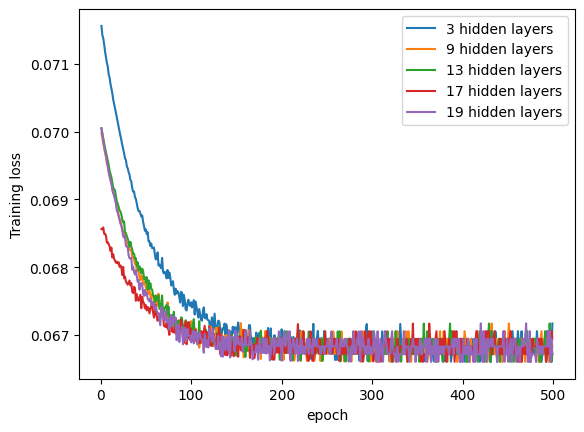

In [8]:
from matplotlib import pyplot as plt #python package to draw graphs in python

plt.plot(epoch_nums, training_loss[0])
plt.plot(epoch_nums, training_loss[1])
plt.plot(epoch_nums, training_loss[2])
plt.plot(epoch_nums, training_loss[3])
plt.plot(epoch_nums, training_loss[4])

plt.xlabel('epoch')
plt.ylabel('Training loss')
plt.legend(['3 hidden layers', '9 hidden layers', '13 hidden layers', '17 hidden layers', '19 hidden layers'], loc='upper right')
plt.show()

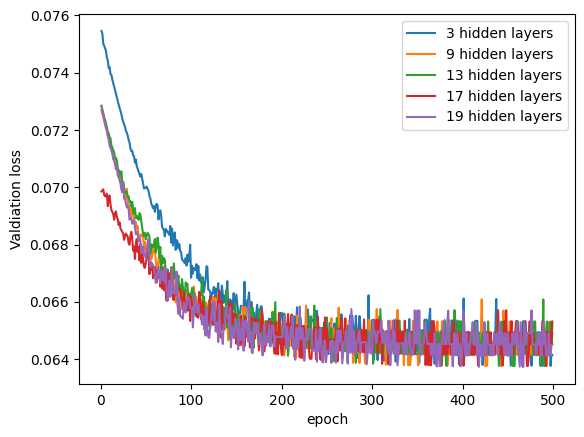

In [9]:
plt.plot(epoch_nums, validation_loss[0])
plt.plot(epoch_nums, validation_loss[1])
plt.plot(epoch_nums, validation_loss[2])
plt.plot(epoch_nums, validation_loss[3])
plt.plot(epoch_nums, validation_loss[4])

plt.xlabel('epoch')
plt.ylabel('Valdiation loss')
plt.legend(['3 hidden layers', '9 hidden layers', '13 hidden layers', '17 hidden layers', '19 hidden layers'], loc='upper right')
plt.show()

## Q9 Model B

# Create Model A using active function Rellu

In [17]:
def ModelB(Input_size,Output_size,Hiden_layers,Node_Number):
  layers =[nn.Linear(Input_size, Node_Number),nn.ReLU()]
  for i in range (Hiden_layers):
    layers.append(nn.Linear(Node_Number, Node_Number))
    layers.append(nn.ReLU())

  #for last layer
  layers.append(nn.Linear(Node_Number, Output_size))
  layers.append(nn.ReLU())

  return nn.Sequential(*layers)


model_B_3 = ModelB(30,2,3,5)
model_B_3

Sequential(
  (0): Linear(in_features=30, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): ReLU()
  (4): Linear(in_features=5, out_features=5, bias=True)
  (5): ReLU()
  (6): Linear(in_features=5, out_features=5, bias=True)
  (7): ReLU()
  (8): Linear(in_features=5, out_features=2, bias=True)
  (9): ReLU()
)

In [18]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()

x,y=breast.data,breast.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1) # splitting for train and validation set

x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5,random_state=1) # further validation set is splitted for test set

batch_size=10,

# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = utils.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=10,shuffle=True)

# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = utils.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=10, shuffle=True)

# Create a dataset and loader for the test data and labels
val_x = torch.Tensor(x_val).float()
val_y = torch.Tensor(y_val).long()
val_ds = utils.TensorDataset(val_x,val_y)
val_loader = td.DataLoader(val_ds, batch_size=10, shuffle=True)

In [19]:
HiddenLayer=[3,9,13,17,19]

model_B_3 =  ModelB(30,2,HiddenLayer[0],5)
model_B_9 =  ModelB(30,2,HiddenLayer[1],5)
model_B_13 = ModelB(30,2,HiddenLayer[2],5)
model_B_17 = ModelB(30,2,HiddenLayer[3],5)
model_B_19 = ModelB(30,2,HiddenLayer[4],5)
MODELSb= [model_B_3 , model_B_9 ,model_B_13 ,model_B_17 ,model_B_19]
model_B_3

Sequential(
  (0): Linear(in_features=30, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): ReLU()
  (4): Linear(in_features=5, out_features=5, bias=True)
  (5): ReLU()
  (6): Linear(in_features=5, out_features=5, bias=True)
  (7): ReLU()
  (8): Linear(in_features=5, out_features=2, bias=True)
  (9): ReLU()
)

In [20]:
OPTIMIZERS=[]
for m in MODELS:
  optimizer = torch.optim.Adam(m.parameters(), lr=0.0001)
  OPTIMIZERS.append(optimizer)



In [21]:
epoch_nums = []
epochs=500
criterion = nn.CrossEntropyLoss()

training_loss=[]
validation_loss=[]
acc_avg = []
loss_avg = []
for i in range (5):
  tr_loss=[]
  val_loss=[]
  acc=[]
  ave_loss = []
  training_loss.append(tr_loss)
  validation_loss.append(val_loss)
  acc_avg.append(acc_avg)
  loss_avg.append(ave_loss)



for epoch in range(1, epochs):
  epoch_nums.append(epoch)
  for i in range(5):
    # Feed the training data into the model to optimize the weights
    train_loss,valid_loss = train(MODELSb[i], train_loader,val_loader, criterion, OPTIMIZERS[i])
    avg_loss, avg_accuracy = test (MODELSb[i], val_loader,criterion)


    # Log the metrcs for this epoch and models

    training_loss[i].append(train_loss)
    validation_loss[i].append(valid_loss)
    acc_avg[i].append(avg_accuracy)
    loss_avg[i].append(avg_loss)






    # Print stats for every 10th epoch so we can see training progress
    if (epoch) % 1 == 0:
        print('Epoch {:d} : for modelA {:} ==> Training loss= {:.4f} , Validation loss= {:.4f} , Average loss= {:.4f} , Accuracy = {:.4f}'.format(epoch,i, train_loss, valid_loss ,avg_loss, avg_accuracy))


Epoch 1 : for modelA 0 ==> Training loss= 0.0701 , Validation loss= 0.0730 , Average loss= 0.0730 , Accuracy = 0.2807
Epoch 1 : for modelA 1 ==> Training loss= 0.0773 , Validation loss= 0.0846 , Average loss= 0.0846 , Accuracy = 0.2807
Epoch 1 : for modelA 2 ==> Training loss= 0.0775 , Validation loss= 0.0843 , Average loss= 0.0837 , Accuracy = 0.2807
Epoch 1 : for modelA 3 ==> Training loss= 0.0692 , Validation loss= 0.0713 , Average loss= 0.0713 , Accuracy = 0.7193
Epoch 1 : for modelA 4 ==> Training loss= 0.0670 , Validation loss= 0.0654 , Average loss= 0.0647 , Accuracy = 0.7193
Epoch 2 : for modelA 0 ==> Training loss= 0.0701 , Validation loss= 0.0730 , Average loss= 0.0730 , Accuracy = 0.2807
Epoch 2 : for modelA 1 ==> Training loss= 0.0774 , Validation loss= 0.0843 , Average loss= 0.0846 , Accuracy = 0.2807
Epoch 2 : for modelA 2 ==> Training loss= 0.0775 , Validation loss= 0.0843 , Average loss= 0.0850 , Accuracy = 0.2807
Epoch 2 : for modelA 3 ==> Training loss= 0.0692 , Valid

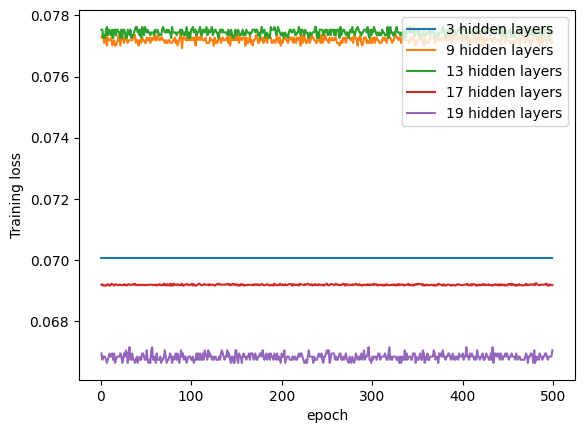

In [22]:
from matplotlib import pyplot as plt #python package to draw graphs in python

plt.plot(epoch_nums, training_loss[0])
plt.plot(epoch_nums, training_loss[1])
plt.plot(epoch_nums, training_loss[2])
plt.plot(epoch_nums, training_loss[3])
plt.plot(epoch_nums, training_loss[4])

plt.xlabel('epoch')
plt.ylabel('Training loss')
plt.legend(['3 hidden layers', '9 hidden layers', '13 hidden layers', '17 hidden layers', '19 hidden layers'], loc='upper right')
plt.show()

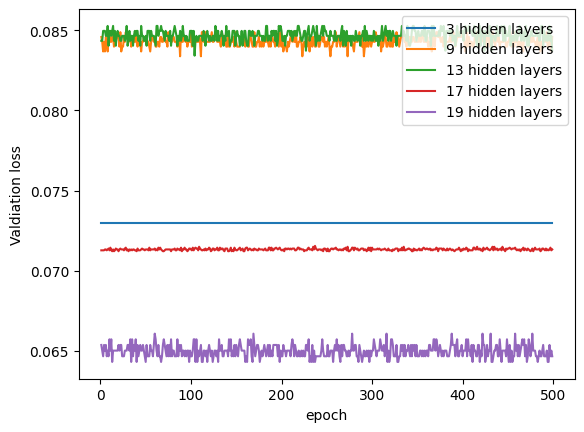

In [23]:
plt.plot(epoch_nums, validation_loss[0])
plt.plot(epoch_nums, validation_loss[1])
plt.plot(epoch_nums, validation_loss[2])
plt.plot(epoch_nums, validation_loss[3])
plt.plot(epoch_nums, validation_loss[4])

plt.xlabel('epoch')
plt.ylabel('Valdiation loss')
plt.legend(['3 hidden layers', '9 hidden layers', '13 hidden layers', '17 hidden layers', '19 hidden layers'], loc='upper right')
plt.show()